# Keras Classification

Keras Documentation: https://keras.io

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

## 1. Read data & create train/test split

In [15]:
df = pd.read_csv('../data/geoloc_elev.csv')

# we only use the 2 features that matter
X = df[['lat', 'lon']].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

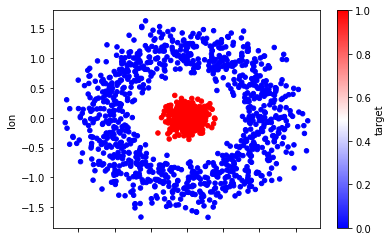

In [16]:
df.plot(kind='scatter',
        x='lat',
        y='lon',
        c='target',
        cmap='bwr');

## 2. Shallow neural network

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [18]:
model = Sequential()

model.add(Dense(1, input_dim=2, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/10
945/945 [==============================] - 0s 301us/step - loss: 0.6624 - acc: 0.5820 - val_loss: 0.6552 - val_acc: 0.6381
Epoch 2/10
945/945 [==============================] - 0s 99us/step - loss: 0.6452 - acc: 0.6582 - val_loss: 0.6550 - val_acc: 0.6381
Epoch 3/10
945/945 [==============================] - 0s 110us/step - loss: 0.6442 - acc: 0.6582 - val_loss: 0.6549 - val_acc: 0.6381
Epoch 4/10
945/945 [==============================] - 0s 102us/step - loss: 0.6440 - acc: 0.6582 - val_loss: 0.6541 - val_acc: 0.6381
Epoch 5/10
945/945 [==============================] - 0s 103us/step - loss: 0.6434 - acc: 0.6582 - val_loss: 0.6586 - val_acc: 0.6381
Epoch 6/10
945/945 [==============================] - 0s 93us/step - loss: 0.6451 - acc: 0.6582 - val_loss: 0.6585 - val_acc: 0.6381
Epoch 7/10
945/945 [==============================] - 0s 92us/step - loss: 0.6446 - acc: 0.6582 - val_loss: 0.6564 - val_acc: 0.6381
Epoch 8/10
945/945 

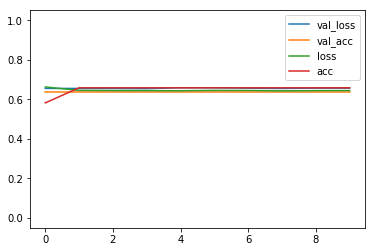

In [19]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

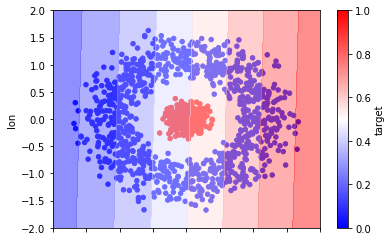

In [20]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

## 3. Deep neural network

In [7]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.5),
              'binary_crossentropy',
              metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 365us/step - loss: 0.6347 - acc: 0.6286 - val_loss: 0.5718 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 124us/step - loss: 0.4421 - acc: 0.8296 - val_loss: 0.3065 - val_acc: 0.9143
Epoch 3/20
945/945 [==============================] - 0s 120us/step - loss: 0.1462 - acc: 0.9968 - val_loss: 0.0736 - val_acc: 1.0000
Epoch 4/20
945/945 [==============================] - 0s 119us/step - loss: 0.0490 - acc: 1.0000 - val_loss: 0.0364 - val_acc: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 120us/step - loss: 0.0257 - acc: 1.0000 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 110us/step - loss: 0.0165 - acc: 1.0000 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 104us/step - loss: 0.0121 - acc: 1.0000 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 8/20
945/9

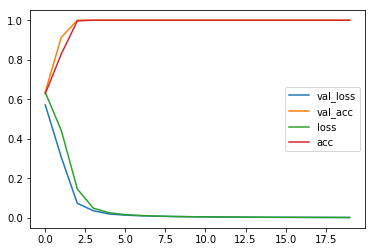

In [8]:
pd.DataFrame(h.history).plot(ylim=(-0.05, 1.05))

## 4. Accuracy score on benchmark, train and test sets

In [9]:
bm_score = pd.Series(y).value_counts()[0] / len(y)
train_score = model.evaluate(X_train, y_train, verbose=0)[1]
test_score = model.evaluate(X_test, y_test,  verbose=0)[1]

print("""Accuracy scores:
   Benchmark:\t{:0.3}
   Train:\t{:0.3}
   Test:\t{:0.3}""".format(bm_score, train_score, test_score))

Accuracy scores:
   Benchmark:	0.667
   Train:	1.0
   Test:	1.0


## 5. Confusion Matrix and Classification Report

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict_classes(X_test)

In [11]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm,
             index=["Miss", "Hit"],
             columns=['pred_Miss', 'pred_Hit'])

,pred_Miss,pred_Hit
Miss,311,0
Hit,0,139


In [12]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       311
          1       1.00      1.00      1.00       139

avg / total       1.00      1.00      1.00       450



## 6. Display the decision boundary

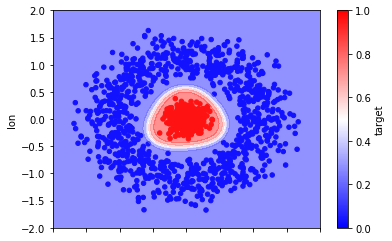

In [13]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

## Exercise 1

- Try changing the network architecture and re-train the model at each change. Can you make it converge faster?
    - add 1 inner layer
    - change the number of nodes in each layer
    - change the activation function
    - change the optimizer (have a look at https://keras.io/optimizers)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 386us/step - loss: 0.6453 - acc: 0.6254 - val_loss: 0.5938 - val_acc: 0.6190
Epoch 2/20
945/945 [==============================] - 0s 108us/step - loss: 0.4949 - acc: 0.7503 - val_loss: 0.4224 - val_acc: 0.8286
Epoch 3/20
945/945 [==============================] - 0s 112us/step - loss: 0.3517 - acc: 0.8698 - val_loss: 0.3288 - val_acc: 0.8762
Epoch 4/20
945/945 [==============================] - 0s 110us/step - loss: 0.2252 - acc: 0.9238 - val_loss: 0.1543 - val_acc: 0.9619
Epoch 5/20
945/945 [==============================] - 0s 108us/step - loss: 0.0842 - acc: 0.9905 - val_loss: 0.0579 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 105us/step - loss: 0.0416 - acc: 0.9979 - val_loss: 0.0340 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 110us/step - loss: 0.0251 - acc: 1.0000 - val_loss: 0.0267 - val_acc: 1.0000
Epoch 8/20
945/9

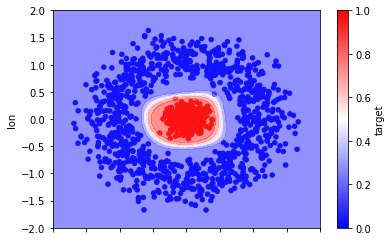

In [21]:
model = Sequential()

model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

Train on 945 samples, validate on 105 samples
Epoch 1/20
945/945 [==============================] - 0s 422us/step - loss: 0.5825 - acc: 0.6402 - val_loss: 0.5069 - val_acc: 0.6381
Epoch 2/20
945/945 [==============================] - 0s 102us/step - loss: 0.3858 - acc: 0.8063 - val_loss: 0.3017 - val_acc: 0.8190
Epoch 3/20
945/945 [==============================] - 0s 107us/step - loss: 0.1602 - acc: 0.9905 - val_loss: 0.0975 - val_acc: 1.0000
Epoch 4/20
945/945 [==============================] - 0s 101us/step - loss: 0.0643 - acc: 0.9989 - val_loss: 0.0444 - val_acc: 1.0000
Epoch 5/20
945/945 [==============================] - 0s 108us/step - loss: 0.0332 - acc: 1.0000 - val_loss: 0.0271 - val_acc: 1.0000
Epoch 6/20
945/945 [==============================] - 0s 104us/step - loss: 0.0205 - acc: 1.0000 - val_loss: 0.0181 - val_acc: 1.0000
Epoch 7/20
945/945 [==============================] - 0s 100us/step - loss: 0.0147 - acc: 1.0000 - val_loss: 0.0130 - val_acc: 1.0000
Epoch 8/20
945/9

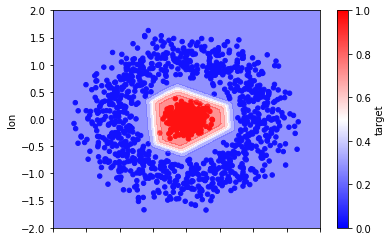

In [26]:
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid') 
])
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

